In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

Q. wine.csv로 와의 품종을 예측하는 모델을 텐서플로/케라스로 아래와 같이 생성하고 학습 및 평가를 수행하세요.
- 입력층 :  Input 레이어 shape=(12,)
- 첫번째층 : 30, activation='relu'
- 두번째층 :12, activation='relu'
- 세번째층 :8, activation='relu'
- 출력층 :1, activation='sigmoid'

### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/kdt_240424/m6_딥러닝/data/wine.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6496 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.4     6496 non-null   float64
 1   0.7     6496 non-null   float64
 2   0       6496 non-null   float64
 3   1.9     6496 non-null   float64
 4   0.076   6496 non-null   float64
 5   11      6496 non-null   float64
 6   34      6496 non-null   float64
 7   0.9978  6496 non-null   float64
 8   3.51    6496 non-null   float64
 9   0.56    6496 non-null   float64
 10  9.4     6496 non-null   float64
 11  5       6496 non-null   int64  
 12  1       6496 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋, 테스트셋
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델구조
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=200, batch_size=200)

# 모델 평가
model.evaluate(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8366 - loss: 0.3640
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9345 - loss: 0.2055
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9418 - loss: 0.1733
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9315 - loss: 0.1860 
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9452 - loss: 0.1689 
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9410 - loss: 0.1740 
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9458 - loss: 0.1672 
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9480 - loss: 0.1550 
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9466 - loss: 0.1543 
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9543 - loss: 0.1426 
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1461 
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

[0.04547794163227081, 0.9884615540504456]

.keras 파일
- 기본적으로 TensorFlow의 SavedModel 형식을 따릅니다. 이는 TensorFlow의 공식 모델 저장 형식으로, 모델 아키텍처, 가중치, 그리고 훈련 구성(옵티마이저 상태 등)을 포함할 수 있습니다.

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
#모델 저장 조건 설정
modelpath="/content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/01-0.9908.keras

Epoch 2: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/02-0.9915.keras

Epoch 3: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/03-0.9846.keras

Epoch 4: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/04-0.9923.keras

Epoch 5: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/05-0.9915.keras

Epoch 6: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/06-0.9908.keras

Epoch 7: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/07-0.9908.keras

Epoch 8: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/08-0.9915.keras

Epoch 9: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/09-0.9892.keras

Epoch 10: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/

In [10]:
# 테스트 결과를 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9881 - loss: 0.0507 
Test accuracy: 0.9884615540504456


History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history' 사전의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [13]:
history.history.shape

AttributeError: 'dict' object has no attribute 'shape'

AttributeError: Line2D.set() got an unexpected keyword argument 'makersize'

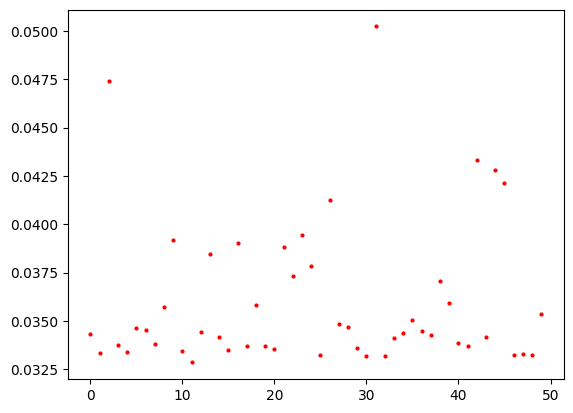

In [15]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋(여기선 검증셋)의 오차를 저장.
y_vloss=history.history['val_loss']

# y_loss에 학습셋의 오차 저장
y_loss=history.history['loss']

# 파란색 점선으로 훈련셋의 오차를 표시.
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validation loss')
plt.plot(x_len, y_loss, "o", c="blue", makersize=2, label="Training loss")

# 그래프에 그리드를 주고 레이블을 표시.
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import random as python_random

np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv("/content/drive/MyDrive/kdt_240424/m6_딥러닝/data/wine.csv")

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.